https://www.kaggle.com/omkar5/dataset-for-bank-loan-prediction (classification)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

df = pd.read_csv("C:/Users/sanja/Desktop/Fall'19/Applied Machine Learning/credit.csv",sep=',', header=0, encoding='cp1252')

In [4]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15,0,253460,427174.0,0.0,0.0


In [5]:
df.dropna(how = "all", inplace = True)

In [6]:
df.drop(['Loan ID', 'Customer ID'], axis=1, inplace=True)

As both 'Loan ID' and 'Customer ID' are unique identifiers, they have been dropped.

In [7]:
df.isnull().sum()

Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 17 columns):
Loan Status                     100000 non-null object
Current Loan Amount             100000 non-null int64
Term                            100000 non-null object
Credit Score                    80846 non-null float64
Annual Income                   80846 non-null float64
Years in current job            95778 non-null object
Home Ownership                  100000 non-null object
Purpose                         100000 non-null object
Monthly Debt                    100000 non-null float64
Years of Credit History         100000 non-null float64
Months since last delinquent    46859 non-null float64
Number of Open Accounts         100000 non-null int64
Number of Credit Problems       100000 non-null int64
Current Credit Balance          100000 non-null int64
Maximum Open Credit             99998 non-null float64
Bankruptcies                    99796 non-null float64
Tax Liens    

In [9]:
df.drop(['Months since last delinquent'], axis=1, inplace=True)

Since 'Month Since las dilinquent' has more than 50% of the data missing it has been dropped 

In [10]:
df.isnull().sum()

Loan Status                      0
Current Loan Amount              0
Term                             0
Credit Score                 19154
Annual Income                19154
Years in current job          4222
Home Ownership                   0
Purpose                          0
Monthly Debt                     0
Years of Credit History          0
Number of Open Accounts          0
Number of Credit Problems        0
Current Credit Balance           0
Maximum Open Credit              2
Bankruptcies                   204
Tax Liens                       10
dtype: int64

In [11]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.000000e+05,80846.000000,8.084600e+04,100000.000000,100000.000000,100000.00000,100000.000000,1.000000e+05,9.999800e+04,99796.000000,99990.000000
mean,1.176045e+07,1076.456089,1.378277e+06,18472.412336,18.199141,11.12853,0.168310,2.946374e+05,7.607984e+05,0.117740,0.029313
std,3.178394e+07,1475.403791,1.081360e+06,12174.992609,7.015324,5.00987,0.482705,3.761709e+05,8.384503e+06,0.351424,0.258182
min,1.080200e+04,585.000000,7.662700e+04,0.000000,3.600000,0.00000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.796520e+05,705.000000,8.488440e+05,10214.162500,13.500000,8.00000,0.000000,1.126700e+05,2.734380e+05,0.000000,0.000000
50%,3.122460e+05,724.000000,1.174162e+06,16220.300000,16.900000,10.00000,0.000000,2.098170e+05,4.678740e+05,0.000000,0.000000
75%,5.249420e+05,741.000000,1.650663e+06,24012.057500,21.700000,14.00000,0.000000,3.679588e+05,7.829580e+05,0.000000,0.000000
max,1.000000e+08,7510.000000,1.655574e+08,435843.280000,70.500000,76.00000,15.000000,3.287897e+07,1.539738e+09,7.000000,15.000000


In [12]:
df['Credit Score']

0         709.0
1           NaN
2         741.0
3         721.0
4           NaN
5        7290.0
6         730.0
7           NaN
8         678.0
9         739.0
10        728.0
11          NaN
12        740.0
13        743.0
14        727.0
15          NaN
16          NaN
17        723.0
18          NaN
19        747.0
20        687.0
21        750.0
22        714.0
23        724.0
24        704.0
25        688.0
26        724.0
27        749.0
28        746.0
29          NaN
          ...  
99970     674.0
99971     616.0
99972     704.0
99973     725.0
99974     731.0
99975     736.0
99976       NaN
99977       NaN
99978       NaN
99979     717.0
99980     745.0
99981     725.0
99982       NaN
99983     726.0
99984     691.0
99985     708.0
99986     741.0
99987     711.0
99988       NaN
99989       NaN
99990     742.0
99991     714.0
99992       NaN
99993     717.0
99994     719.0
99995     725.0
99996     732.0
99997     742.0
99998     746.0
99999     743.0
Name: Credit Score, Leng

In [13]:
df[df['Credit Score']> 850]

,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
5,Charged Off,206602,Short Term,7290.0,896857.0,10+ years,Home Mortgage,Debt Consolidation,16367.74,17.3,6,0,215308,272448.0,0.0,0.0
43,Charged Off,288948,Short Term,7120.0,537472.0,10+ years,Rent,Debt Consolidation,5777.90,14.8,4,0,132468,164406.0,0.0,0.0
51,Charged Off,219692,Long Term,6610.0,527839.0,10+ years,Rent,Debt Consolidation,14207.63,17.0,9,0,254277,379918.0,0.0,0.0
56,Charged Off,78012,Short Term,7380.0,728726.0,4 years,Rent,major_purchase,10135.36,11.4,8,0,104633,199936.0,0.0,0.0
65,Charged Off,523908,Long Term,7370.0,1028774.0,6 years,Home Mortgage,Debt Consolidation,22632.99,19.3,5,0,474658,742720.0,0.0,0.0
97,Charged Off,78738,Short Term,6240.0,536370.0,2 years,Rent,other,14034.92,10.5,14,0,138586,266112.0,0.0,0.0
117,Charged Off,86174,Short Term,7210.0,837311.0,1 year,Home Mortgage,Debt Consolidation,10884.91,13.6,15,0,360867,671770.0,0.0,0.0
160,Charged Off,87912,Short Term,7500.0,960184.0,10+ years,Rent,Debt Consolidation,3432.73,43.3,9,0,86051,301026.0,0.0,0.0
165,Charged Off,168300,Long Term,7020.0,688522.0,2 years,Rent,other,11762.14,17.0,9,0,128041,273042.0,0.0,0.0
200,Charged Off,322872,Long Term,7080.0,985245.0,10+ years,Home Mortgage,Home Improvements,10895.17,17.5,7,0,106894,357698.0,0.0,0.0


In [14]:
df['Credit Score'] = df['Credit Score'].apply(lambda val: (val /10) if val>850 else val)

The mean of 'credit score'  while using the describe function is shown to be 1076.456 which is abnormal as credit score ranges between 300 and 850 and pulling out the credit score column it showed there are numbers ranging from 1300 to 1850(whole numbers). To tackle this irregularity we divided these numbers by 10 assuming that it is incorrectly given with an additional zero.

In [15]:
import matplotlib.pyplot as plt

In [16]:
avg_cs = df['Credit Score'].mean()

In [17]:
avg_cs

716.2934468000891

In [18]:
df["Credit Score"].fillna(avg_cs, inplace = True) 

The mean of 'credit score'  while using the describe function is shown to be 1076.456 which is abnormal as credit score ranges between 300 and 850 and pulling out the credit score column it showed there are numbers ranging from 1300 to 1850(whole numbers). To tackle this irregularity we divided these numbers by 10 assuming that it is incorrectly given with an additional zero.

In [19]:
import matplotlib.pyplot as plt

In [20]:
avg_cs = df['Credit Score'].mean()

In [21]:
avg_cs

716.2934468002062

In [22]:
df["Credit Score"].fillna(avg_cs, inplace = True) 

There are 19514 values missing from 'credit score'.So it has been replaced with the average of the 'credit score' column, instead of filling it with 0s as there is no such thing called zero credit score.

In [23]:
avg_inc= df['Annual Income'].mean()

In [24]:
avg_inc


1378276.559842169

In [25]:
df["Annual Income"].fillna(avg_inc, inplace = True)

There are 19514 values missing from 'Annual Income'.Again replaced all the NaN values with the average of the Annual Income column, instead of filling it with zeros because a zero income might translate that the person is unemployed in whcih case the loan wouldn't have been sanctioned.

In [26]:
avg_oc= df['Maximum Open Credit'].mean()

In [27]:
df["Maximum Open Credit"].fillna(avg_inc, inplace = True)

There are only 2 values missing from'Maximum Open Credit'.it has been replaced with the average of this column.

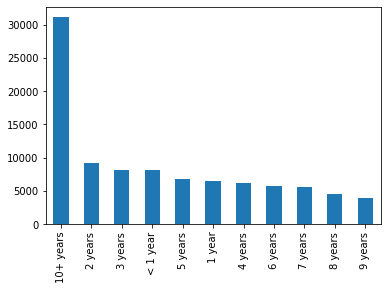

In [28]:
%matplotlib inline

df['Years in current job'].value_counts().plot(kind='bar')


In [29]:
df["Years in current job"].fillna('10+ years', inplace = True)

There are about 4222 values missing from 'Years in current job'. As it can be seen in the bar plot, majority of the customers as 10+ years experience,so NaN values have been filled with 10+ years.

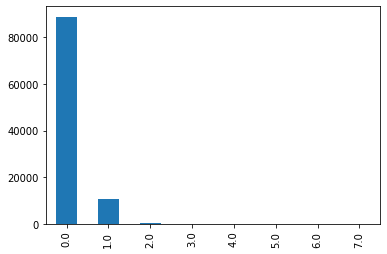

In [30]:
%matplotlib inline

df['Bankruptcies'].value_counts().plot(kind='bar')
plt.show()

In [31]:
df["Bankruptcies"].fillna(0, inplace = True)

There are 204 missing values in 'Bankruptcies' and as almost 90% of the customers have not filed for any bankruptcy, the NaN values have been replaced with 0s.

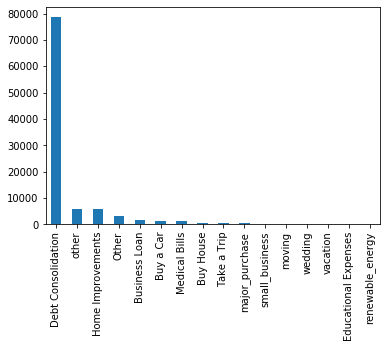

Debt Consolidation      78552
other                    6037
Home Improvements        5839
Other                    3250
Business Loan            1569
Buy a Car                1265
Medical Bills            1127
Buy House                 678
Take a Trip               573
major_purchase            352
small_business            283
moving                    150
wedding                   115
vacation                  101
Educational Expenses       99
renewable_energy           10
Name: Purpose, dtype: int64

In [32]:
%matplotlib inline

a= df['Purpose'].value_counts()
a.plot(kind='bar')
plt.show()
a


The 'Purpose' hardly as any correlation with loan repayment status and also it has 15 categories and biased over one, 'Debt Consolidation', including this will increase the model complexity without giving much information on the target variable.

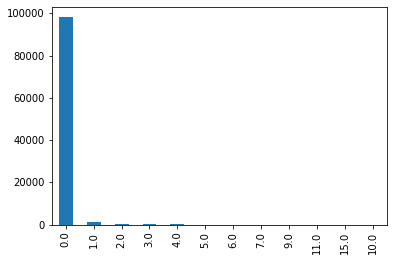

In [33]:
%matplotlib inline

df['Tax Liens'].value_counts().plot(kind='bar')
plt.show()

In [34]:
df["Tax Liens"].fillna(0, inplace = True)

There are 10 missing values in 'Tax Liens' and as almost 99% of the customers have no liens, the missing values have been replaced with 0.

In [35]:
df.isnull().sum()

Loan Status                  0
Current Loan Amount          0
Term                         0
Credit Score                 0
Annual Income                0
Years in current job         0
Home Ownership               0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
dtype: int64

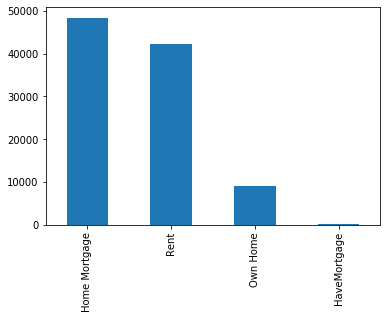

Home Mortgage    48410
Rent             42194
Own Home          9182
HaveMortgage       214
Name: Home Ownership, dtype: int64

In [36]:
%matplotlib inline

df['Home Ownership'].value_counts().plot(kind='bar')
plt.show()
df['Home Ownership'].value_counts()

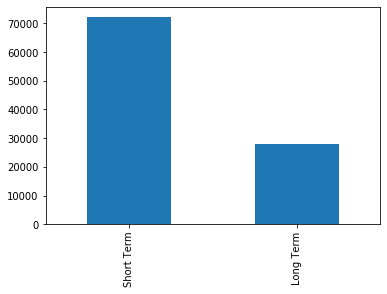

Short Term    72208
Long Term     27792
Name: Term, dtype: int64

In [37]:
%matplotlib inline

df['Term'].value_counts().plot(kind='bar')
plt.show()

df['Term'].value_counts()

In [38]:
df = pd.get_dummies(df, columns=['Term', 'Home Ownership'], prefix=['Term', 'home'] ,dummy_na=True)

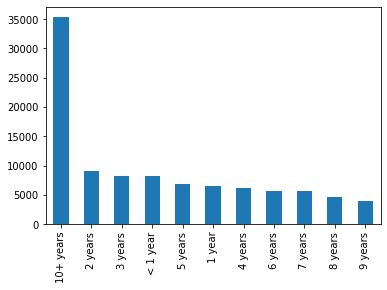

10+ years    35343
2 years       9134
3 years       8169
< 1 year      8164
5 years       6787
1 year        6460
4 years       6143
6 years       5686
7 years       5577
8 years       4582
9 years       3955
Name: Years in current job, dtype: int64

In [39]:

%matplotlib inline

df['Years in current job'].value_counts().plot(kind='bar')
plt.show()

df['Years in current job'].value_counts()

In [40]:
df[['Years in current job']]= df['Years in current job'].map({'8 years':8, '3 years':3, '5 years':5,'2 years':2, '10+ years': 10, 
                                            '< 1 year':0.6,'4 years':4, '9 years':9, '7 years':7, '1 year':1, '6 years':6})


 < 1 has been changed to 0.6 as the model won't accept characters, and this value serves as a median for people having less than one year of experience.

In [41]:
df['Years in current job'] = df['Years in current job'].astype(float)

Converting the data type of 'Years in current job' from object to float to make it as a ordinal data.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 22 columns):
Loan Status                  100000 non-null object
Current Loan Amount          100000 non-null int64
Credit Score                 100000 non-null float64
Annual Income                100000 non-null float64
Years in current job         100000 non-null float64
Purpose                      100000 non-null object
Monthly Debt                 100000 non-null float64
Years of Credit History      100000 non-null float64
Number of Open Accounts      100000 non-null int64
Number of Credit Problems    100000 non-null int64
Current Credit Balance       100000 non-null int64
Maximum Open Credit          100000 non-null float64
Bankruptcies                 100000 non-null float64
Tax Liens                    100000 non-null float64
Term_Long Term               100000 non-null uint8
Term_Short Term              100000 non-null uint8
Term_nan                     100000 non-null uint8
home_

Fully Paid     77361
Charged Off    22639
Name: Loan Status, dtype: int64

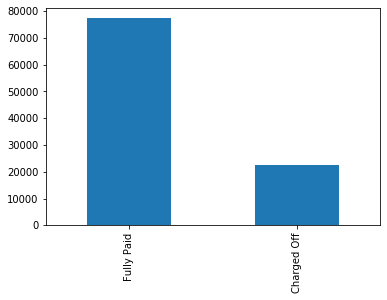

In [43]:
df['Loan Status'].value_counts().plot(kind='bar')
df['Loan Status'].value_counts()

In [44]:
df[['Loan Status']] = df['Loan Status'].map({'Fully Paid':1, 'Charged Off': 0})

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 99999
Data columns (total 22 columns):
Loan Status                  100000 non-null int64
Current Loan Amount          100000 non-null int64
Credit Score                 100000 non-null float64
Annual Income                100000 non-null float64
Years in current job         100000 non-null float64
Purpose                      100000 non-null object
Monthly Debt                 100000 non-null float64
Years of Credit History      100000 non-null float64
Number of Open Accounts      100000 non-null int64
Number of Credit Problems    100000 non-null int64
Current Credit Balance       100000 non-null int64
Maximum Open Credit          100000 non-null float64
Bankruptcies                 100000 non-null float64
Tax Liens                    100000 non-null float64
Term_Long Term               100000 non-null uint8
Term_Short Term              100000 non-null uint8
Term_nan                     100000 non-null uint8
home_H

In [46]:
df.drop(['home_nan'], axis=1, inplace=True)

In [47]:
df.Term_nan.value_counts()

0    100000
Name: Term_nan, dtype: int64

In [48]:
df.drop(['Term_nan'], axis=1, inplace=True)

In [49]:
df                  

,Loan Status,Current Loan Amount,Credit Score,Annual Income,Years in current job,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Term_Long Term,Term_Short Term,home_HaveMortgage,home_Home Mortgage,home_Own Home,home_Rent
0,1,445412,709.000000,1.167493e+06,8.0,Home Improvements,5214.74,17.2,6,1,228190,416746.0,1.0,0.0,0,1,0,1,0,0
1,1,262328,716.293447,1.378277e+06,10.0,Debt Consolidation,33295.98,21.1,35,0,229976,850784.0,0.0,0.0,0,1,0,1,0,0
2,1,99999999,741.000000,2.231892e+06,8.0,Debt Consolidation,29200.53,14.9,18,1,297996,750090.0,0.0,0.0,0,1,0,0,1,0
3,1,347666,721.000000,8.069490e+05,3.0,Debt Consolidation,8741.90,12.0,9,0,256329,386958.0,0.0,0.0,1,0,0,0,1,0
4,1,176220,716.293447,1.378277e+06,5.0,Debt Consolidation,20639.70,6.1,15,0,253460,427174.0,0.0,0.0,0,1,0,0,0,1
5,0,206602,729.000000,8.968570e+05,10.0,Debt Consolidation,16367.74,17.3,6,0,215308,272448.0,0.0,0.0,0,1,0,1,0,0
6,1,217646,730.000000,1.184194e+06,0.6,Debt Consolidation,10855.08,19.6,13,1,122170,272052.0,1.0,0.0,0,1,0,1,0,0
7,0,648714,716.293447,1.378277e+06,0.6,Buy House,14806.13,8.2,15,0,193306,864204.0,0.0,0.0,1,0,0,1,0,0
8,1,548746,678.000000,2.559110e+06,2.0,Debt Consolidation,18660.28,22.6,4,0,437171,555038.0,0.0,0.0,0,1,0,0,0,1
9,1,215952,739.000000,1.454735e+06,0.6,Debt Consolidation,39277.75,13.9,20,0,669560,1021460.0,0.0,0.0,0,1,0,0,0,1


In [50]:
df.drop('home_HaveMortgage',1,inplace=True)

Dropping 'home_HaveMortgae' as it is not clear what it is as there is another category called 'home_HomeMortgage' and also 'home_HaveMortgae'has only 212 values which accounts for only 0.002% of the original data, so it has been dropped.

In [51]:
df.isnull().sum()

Loan Status                  0
Current Loan Amount          0
Credit Score                 0
Annual Income                0
Years in current job         0
Purpose                      0
Monthly Debt                 0
Years of Credit History      0
Number of Open Accounts      0
Number of Credit Problems    0
Current Credit Balance       0
Maximum Open Credit          0
Bankruptcies                 0
Tax Liens                    0
Term_Long Term               0
Term_Short Term              0
home_Home Mortgage           0
home_Own Home                0
home_Rent                    0
dtype: int64

In [52]:
df.drop('Purpose',1,inplace=True)

In [53]:

import numpy as np
np.random.seed(32)


In [54]:

import random
df1= df.sample(5000)


In [55]:
X = df1.drop('Loan Status', axis=1)
y=df1['Loan Status']

In [56]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [57]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [58]:
df.shape

(100000, 18)

# MODELS

# HARD VOTING CLASSIFIERS

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC



In [60]:
from sklearn.model_selection import GridSearchCV


In [61]:
from sklearn.metrics import roc_auc_score

In [62]:
log_clf = LogisticRegression(C = 1000, penalty= 'l1')
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(37)
knn_clf.fit(X_train, y_train)
svm_clf = SVC(C=1, degree=1, kernel='poly')
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import roc_auc_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, roc_auc_score(y_test, y_pred))


LogisticRegression 0.500931899641577
KNeighborsClassifier 0.5012186379928315
SVC 0.5
VotingClassifier 0.5


# SOFT VOTING CLASSIFIER

In [63]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [64]:
lsc = SVC(C=1, degree=1, kernel='poly', probability =True)
lsc.fit(X_train, y_train)



SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [65]:

svc = SVC(C=10, gamma=0.1, kernel='linear', probability=True)
svc.fit(X_train, y_train)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [66]:
dt = DecisionTreeClassifier(max_depth= 7)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [67]:
voting_clf = VotingClassifier(estimators=[('lsvc', lsc), ('svc', svc), ('dt', dt)], voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lsvc',
                              SVC(C=1, cache_size=200, class_weight=None,
                                  coef0=0.0, decision_function_shape='ovr',
                                  degree=1, gamma='auto_deprecated',
                                  kernel='poly', max_iter=-1, probability=True,
                                  random_state=None, shrinking=True, tol=0.001,
                                  verbose=False)),
                             ('svc',
                              SVC(C=10, cache_size=200, class_weight=None,
                                  coef0=0.0, decision_function_shape='ovr',
                                  degree=3...
                                  verbose=False)),
                             ('dt',
                              DecisionTreeClassifier(class_weight=None,
                                                     criterion='gini',
                                                     max_depth=7,
  

In [68]:
from sklearn.metrics import roc_auc_score
for clf in (lsc, svc, dt, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, roc_auc_score(y_test, y_pred))

SVC 0.5
SVC 0.5
DecisionTreeClassifier 0.5143369175627239
VotingClassifier 0.49706093189964157


# BAGGING - Decision Tree

In [69]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_samples' : [1,50,100,200,300,500],
    'n_estimators' : [10, 15,50,100,500,250]
    }

clf = GridSearchCV(BaggingClassifier(DecisionTreeClassifier(max_depth = 7),
                                   max_features = 0.5),
                   param_grid, scoring = 'roc_auc')
clf.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=7,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                               min_samples_split=2,
                                                 

In [70]:
print("Best cross-validation score", clf.best_score_)
print(clf.best_params_)
print(clf.best_estimator_)

Best cross-validation score 0.6638871490289264
{'max_samples': 500, 'n_estimators': 250}
BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=7,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_stat

In [71]:

dt_clf = DecisionTreeClassifier(max_depth=7,random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=250, max_samples=500, bootstrap=True, random_state=0, oob_score=True)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [72]:
from  sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))

0.5015770609318997


In [73]:
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

Train score: 0.77
Test score: 0.78


In [74]:
tree_clf = DecisionTreeClassifier(max_depth=7,random_state=0)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

print(roc_auc_score(y_test, y_pred_tree))

0.5114695340501791


In [75]:
bag_clf.oob_score_

0.76775

# Bagging - KNeighborsClassifier

In [76]:

from sklearn.ensemble import BaggingClassifier


In [77]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {
    'max_samples' : [100,200,400],
    'n_estimators' : [10,50,100,500,250]
    }

clf = GridSearchCV(BaggingClassifier(KNeighborsClassifier(59),
                                   bootstrap=True, random_state=0, oob_score=True),
                   param_grid, scoring = 'roc_auc')
clf.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                                             leaf_size=30,
                                                                             metric='minkowski',
                                                                             metric_params=None,
                                                                             n_jobs=None,
                                                                             n_neighbors=59,
                                                                             p=2,
                                                                             weights='uniform'),
                                         bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
 

In [78]:
print("Best cross-validation score", clf.best_score_)
print(clf.best_params_)
print(clf.best_estimator_)

Best cross-validation score 0.6305354063139433
{'max_samples': 400, 'n_estimators': 100}
BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=59, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=400, n_estimators=100, n_jobs=None,
                  oob_score=True, random_state=0, verbose=0, warm_start=False)


In [79]:

bag_clf = BaggingClassifier(KNeighborsClassifier(59), n_estimators=100, max_samples=400, bootstrap=True, random_state=0, oob_score=True)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [80]:
from  sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred))

0.5


In [81]:
bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

Train score: 0.77
Test score: 0.78


In [82]:
bag_clf.oob_score_

0.76725

# Ada Boosting - logistic regression

In [83]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
param_grid = {
    'learning_rate' : [0.01, 0.1, 0.2],
    'n_estimators' : [10,50,100,500,200]
    }

ada_logreg = AdaBoostClassifier(LogisticRegression( C= 1000, penalty = 'l1'),algorithm='SAMME')
clf_ada = GridSearchCV(ada_logreg,param_grid, scoring = 'roc_auc')
clf_ada.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=LogisticRegression(C=1000,
                                                                            class_weight=None,
                                                                            dual=False,
                                                                            fit_intercept=True,
                                                                            intercept_scaling=1,
                                                                            l1_ratio=None,
                                                                            max_iter=100,
                                                                            multi_class='warn',
                                                                            n_jobs=None,
                                                        

In [84]:
print("Best cross-validation score", clf_ada.best_score_)
print(clf_ada.best_params_)
print(clf_ada.best_estimator_)

Best cross-validation score 0.6183924288392691
{'learning_rate': 0.2, 'n_estimators': 200}
AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=LogisticRegression(C=1000, class_weight=None,
                                                     dual=False,
                                                     fit_intercept=True,
                                                     intercept_scaling=1,
                                                     l1_ratio=None,
                                                     max_iter=100,
                                                     multi_class='warn',
                                                     n_jobs=None, penalty='l1',
                                                     random_state=None,
                                                     solver='warn', tol=0.0001,
                                                     verbose=0,
                                                     warm_start=False),
   

In [85]:
dt = LogisticRegression(C = 1000, penalty= 'l1')
ada_lreg = AdaBoostClassifier(base_estimator=dt, n_estimators=200, random_state=0, learning_rate=0.2)

In [86]:
ada_lreg.fit(X_train, y_train)
y_pred_proba = ada_lreg.predict_proba(X_test)[:,1]

In [87]:
print('Train score: {:.2f}'.format(ada_lreg.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_lreg.score(X_test, y_test)))

Train score: 0.77
Test score: 0.78


In [88]:
from sklearn.metrics import roc_auc_score

ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 0.63


# AdaBoosting - Linear SVC

In [89]:

param_grid = {
    'learning_rate' : [0.01, 0.1, 0.2],
    'n_estimators' : [10,50,100,200]
    }

ada = AdaBoostClassifier(base_estimator= LinearSVC(C=1),algorithm='SAMME')
clf = GridSearchCV(ada,param_grid, scoring = 'roc_auc')
clf.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=LinearSVC(C=1,
                                                                   class_weight=None,
                                                                   dual=True,
                                                                   fit_intercept=True,
                                                                   intercept_scaling=1,
                                                                   loss='squared_hinge',
                                                                   max_iter=1000,
                                                                   multi_class='ovr',
                                                                   penalty='l2',
                                                                   random_state=None,
                                               

In [90]:
print("Best cross-validation score", clf.best_score_)
print(clf.best_params_)
print(clf.best_estimator_)

Best cross-validation score 0.501285416057683
{'learning_rate': 0.01, 'n_estimators': 10}
AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=LinearSVC(C=1, class_weight=None, dual=True,
                                            fit_intercept=True,
                                            intercept_scaling=1,
                                            loss='squared_hinge', max_iter=1000,
                                            multi_class='ovr', penalty='l2',
                                            random_state=None, tol=0.0001,
                                            verbose=0),
                   learning_rate=0.01, n_estimators=10, random_state=None)


In [91]:

lsc = LinearSVC(C=1)
ada_linearsvc = AdaBoostClassifier(base_estimator=lsc, algorithm='SAMME', n_estimators=10, random_state=0, learning_rate=0.01)

In [92]:
ada_linearsvc.fit(X_train, y_train)

y_pred_proba = ada_linearsvc.predict(X_test)

In [93]:
print('Train score: {:.2f}'.format(ada_linearsvc.score(X_train, y_train)))
print('Test score: {:.2f}'.format(ada_linearsvc.score(X_test, y_test)))

Train score: 0.77
Test score: 0.77


In [94]:


ada_roc_auc = roc_auc_score(y_test, y_pred_proba)

print('ROC AUC score: {:.2f}'.format(ada_roc_auc))

ROC AUC score: 0.50


# Gradient boosting

In [95]:
from  sklearn.ensemble import GradientBoostingClassifier


param_grid = {
    'learning_rate' : [0.001, 0.01,0.1,1],
    'n_estimators' : [10,50,100,500,200],
    'max_depth' : [2,5,10,15],
        }

param_grid

{'learning_rate': [0.001, 0.01, 0.1, 1],
 'n_estimators': [10, 50, 100, 500, 200],
 'max_depth': [2, 5, 10, 15]}

In [96]:
grad= GradientBoostingClassifier()
grd = GridSearchCV(grad,param_grid, scoring = 'roc_auc')
grd.fit(X_train, y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  pre

In [97]:
print("Best cross-validation score", grd.best_score_)
print(grd.best_params_)
print(grd.best_estimator_)

Best cross-validation score 0.6684648937382328
{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100}
GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [98]:

gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=100, learning_rate=0.1, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [99]:
print('Train score: {:.2f}'.format(gbrt.score(X_train, y_train)))
print('Test score: {:.2f}'.format(gbrt.score(X_test, y_test)))

Train score: 0.78
Test score: 0.77


In [100]:
y_pred = gbrt.predict(X_test)

In [101]:
print("roc_auc: ", roc_auc_score(y_test, y_pred))

roc_auc:  0.49770609318996417


# Pasting - Decision Tree

In [102]:
param_grid = {
    'max_samples' : [10,50,100,250,500],
    'n_estimators' : [10,100,500,200,400]
    }
dt = DecisionTreeClassifier(max_depth=7,random_state=0)
bag_clf = BaggingClassifier(dt,bootstrap=False)
bag_grid= GridSearchCV(bag_clf,param_grid,verbose=3)
bag_grid.fit(X_train, y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] max_samples=10, n_estimators=10 .................................
[CV] ..... max_samples=10, n_estimators=10, score=0.747, total=   0.0s
[CV] max_samples=10, n_estimators=10 .................................
[CV] ..... max_samples=10, n_estimators=10, score=0.740, total=   0.0s
[CV] max_samples=10, n_estimators=10 .................................
[CV] ..... max_samples=10, n_estimators=10, score=0.760, total=   0.0s
[CV] max_samples=10, n_estimators=100 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .... max_samples=10, n_estimators=100, score=0.767, total=   0.1s
[CV] max_samples=10, n_estimators=100 ................................
[CV] .... max_samples=10, n_estimators=100, score=0.766, total=   0.2s
[CV] max_samples=10, n_estimators=100 ................................
[CV] .... max_samples=10, n_estimators=100, score=0.766, total=   0.1s
[CV] max_samples=10, n_estimators=500 ................................
[CV] .... max_samples=10, n_estimators=500, score=0.767, total=   0.5s
[CV] max_samples=10, n_estimators=500 ................................
[CV] .... max_samples=10, n_estimators=500, score=0.767, total=   0.5s
[CV] max_samples=10, n_estimators=500 ................................
[CV] .... max_samples=10, n_estimators=500, score=0.767, total=   0.5s
[CV] max_samples=10, n_estimators=200 ................................
[CV] .... max_samples=10, n_estimators=200, score=0.767, total=   0.2s
[CV] max_samples=10, n_estimators=200 ................................
[CV] .

[CV] ... max_samples=500, n_estimators=100, score=0.766, total=   0.3s
[CV] max_samples=500, n_estimators=100 ...............................
[CV] ... max_samples=500, n_estimators=100, score=0.768, total=   0.3s
[CV] max_samples=500, n_estimators=100 ...............................
[CV] ... max_samples=500, n_estimators=100, score=0.764, total=   0.3s
[CV] max_samples=500, n_estimators=500 ...............................
[CV] ... max_samples=500, n_estimators=500, score=0.768, total=   1.5s
[CV] max_samples=500, n_estimators=500 ...............................
[CV] ... max_samples=500, n_estimators=500, score=0.768, total=   1.5s
[CV] max_samples=500, n_estimators=500 ...............................
[CV] ... max_samples=500, n_estimators=500, score=0.766, total=   1.5s
[CV] max_samples=500, n_estimators=200 ...............................
[CV] ... max_samples=500, n_estimators=200, score=0.767, total=   0.6s
[CV] max_samples=500, n_estimators=200 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   32.6s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=7,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                               min_samples_split=2,
                                                 

In [103]:
print("Best cross-validation score", bag_grid.best_score_)
print(bag_grid.best_params_)
print(bag_grid.best_estimator_)

Best cross-validation score 0.76825
{'max_samples': 250, 'n_estimators': 200}
BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=7,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=0,
      

In [104]:
past_dt  =  BaggingClassifier(dt_clf,bootstrap=False, 
                            random_state=0, max_samples = 250, n_estimators = 200)

In [105]:
past_dt.fit(X_train, y_train)
y_pred = past_dt.predict(X_test)

In [106]:
print('Train score: {:.2f}'.format(past_dt.score(X_train, y_train)))
print('Test score: {:.2f}'.format(past_dt.score(X_test, y_test)))

Train score: 0.77
Test score: 0.78


In [107]:
print("roc_auc: ", roc_auc_score(y_test, y_pred))

roc_auc:  0.5015770609318997


# Pasting - knn 

In [108]:
from sklearn.neighbors import KNeighborsClassifier
param_grid = {
    'max_samples' : [100,200,400],
    'n_estimators' : [10,50,100,500,250]
    }
knn = KNeighborsClassifier(59)
bag_clf = BaggingClassifier(knn,bootstrap=False)
bag_grid= GridSearchCV(bag_clf,param_grid,verbose=3)
bag_grid.fit(X_train, y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits
[CV] max_samples=100, n_estimators=10 ................................
[CV] .... max_samples=100, n_estimators=10, score=0.767, total=   0.1s
[CV] max_samples=100, n_estimators=10 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .... max_samples=100, n_estimators=10, score=0.767, total=   0.1s
[CV] max_samples=100, n_estimators=10 ................................
[CV] .... max_samples=100, n_estimators=10, score=0.767, total=   0.1s
[CV] max_samples=100, n_estimators=50 ................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] .... max_samples=100, n_estimators=50, score=0.767, total=   0.5s
[CV] max_samples=100, n_estimators=50 ................................
[CV] .... max_samples=100, n_estimators=50, score=0.767, total=   0.6s
[CV] max_samples=100, n_estimators=50 ................................
[CV] .... max_samples=100, n_estimators=50, score=0.767, total=   0.5s
[CV] max_samples=100, n_estimators=100 ...............................
[CV] ... max_samples=100, n_estimators=100, score=0.767, total=   1.0s
[CV] max_samples=100, n_estimators=100 ...............................
[CV] ... max_samples=100, n_estimators=100, score=0.767, total=   1.1s
[CV] max_samples=100, n_estimators=100 ...............................
[CV] ... max_samples=100, n_estimators=100, score=0.767, total=   1.1s
[CV] max_samples=100, n_estimators=500 ...............................
[CV] ... max_samples=100, n_estimators=500, score=0.767, total=   5.4s
[CV] max_samples=100, n_estimators=500 ...............................
[CV] .

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  2.7min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                                             leaf_size=30,
                                                                             metric='minkowski',
                                                                             metric_params=None,
                                                                             n_jobs=None,
                                                                             n_neighbors=59,
                                                                             p=2,
                                                                             weights='uniform'),
                                         bootstrap=False,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,


In [109]:
print("Best cross-validation score", bag_grid.best_score_)
print(bag_grid.best_params_)
print(bag_grid.best_estimator_)

Best cross-validation score 0.76725
{'max_samples': 100, 'n_estimators': 10}
BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=59, p=2,
                                                      weights='uniform'),
                  bootstrap=False, bootstrap_features=False, max_features=1.0,
                  max_samples=100, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)


In [110]:
past2  =  BaggingClassifier(knn,bootstrap=False, 
                            random_state=0, max_samples = 100, n_estimators = 10)

In [111]:
past2.fit(X_train, y_train)
y_pred = past2.predict(X_test)

# PCA

In [112]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC

pca_reg = PCA()
#train
pca_reg.fit(X_train)
#transform
X_train_pca = pca_reg.transform(X_train)
X_test_pca = pca_reg.transform(X_test)

In [113]:
X_train_pca.shape

(4000, 17)

In [114]:
pca_reg.n_components_

17

In [115]:
pca_reg = PCA(n_components=0.95)
pca_reg.fit(X_train)
X_train_reduced = pca_reg.transform(X_train)
X_test_reduced = pca_reg.transform(X_test)

In [116]:
pca_reg.n_components_

6

In [117]:
pca_reg.explained_variance_

array([0.50124587, 0.36962942, 0.1369609 , 0.12072493, 0.10066321,
       0.02234569])

# PCA with all models


# KNeighborsClassifier

In [118]:
from sklearn.model_selection import cross_val_score

k_list = list(range(1,76))
param_grid = dict(n_neighbors=k_list)
print(param_grid)


{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]}


In [119]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train_reduced, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [120]:
print('Best cross-validation score',grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)


Best cross-validation score 0.6319373948549776
{'n_neighbors': 43}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=43, p=2,
                     weights='uniform')


In [121]:

knnc = KNeighborsClassifier(43)
knnc.fit(X_train_reduced, y_train)
print('train score',knnc.score(X_train_reduced, y_train))
print('test score',knnc.score(X_test_reduced, y_test))



train score 0.7685
test score 0.772


In [122]:
knnc_pred = knnc.predict(X_test_reduced)

In [123]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, knnc_pred)
print("Confusion matrix:\n{}".format(confusion))


Confusion matrix:
[[  3 222]
 [  6 769]]


In [124]:

from sklearn.metrics import f1_score

print("f1 score knn: {:.2f}".format(f1_score(y_test, knnc_pred)))


f1 score knn: 0.87


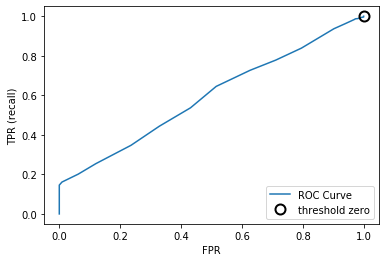

In [125]:

%matplotlib inline 
from sklearn import metrics
from sklearn.metrics import roc_curve
import numpy as np
from sklearn.metrics import auc

y_prob = knnc.predict_proba(X_test_reduced)
prob = np.array(y_prob)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, prob)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)


In [126]:

from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test,prob))


0.5933591397849463


The roc_auc score has been calculated as this model is imbalenced. The roc_auc score evaluates the model more accurately as it takes both false positives and true positives into account.

# LOGISTIC REGRESSION


In [127]:
from sklearn.linear_model import LogisticRegression


In [128]:
penalty = ["l1", "l2"]
c_range=[ 0.01, 0.1, 1, 10, 100]
param_grid = dict({'penalty': penalty, 'C': c_range})
param_grid


{'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]}

As generally the values for C ranges from 10^-2 to 10^3, we have taken all the values in param_grid.


In [129]:
grid1 = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='roc_auc')
grid1.fit(X_train_reduced, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [130]:
print("Best cross-validation score", grid1.best_score_)
print(grid1.best_params_)
print(grid1.best_estimator_)

Best cross-validation score 0.6435398156314875
{'C': 0.1, 'penalty': 'l2'}
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


In [131]:
lc = LogisticRegression(C=0.1, penalty= 'l2')
lc.fit(X_train_reduced, y_train)
print('train score',lc.score(X_train_reduced, y_train))
print('test score',lc.score(X_test_reduced, y_test))

train score 0.76725
test score 0.775


In [132]:
lc_pred = lc.predict(X_test_reduced)


In [133]:
from sklearn.metrics import confusion_matrix

print("Confusion matrix:\n{}".format(confusion_matrix(y_test, lc_pred)))

Confusion matrix:
[[  0 225]
 [  0 775]]


In [134]:
from sklearn.metrics import f1_score

print("f1 score knn: {:.2f}".format(f1_score(y_test, lc_pred)))


f1 score knn: 0.87


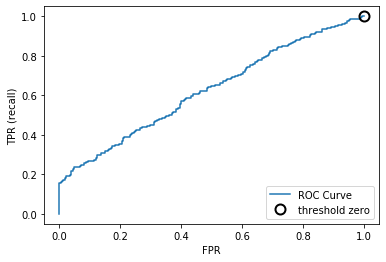

In [135]:
%matplotlib inline 
from sklearn import metrics
from sklearn.metrics import roc_curve
import numpy as np
from sklearn.metrics import auc

y_prob2 = lc.predict_proba(X_test_reduced)
prob2 = np.array(y_prob2)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, prob2)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [136]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, prob2))

0.6236100358422939


# LINEAR SVM


In [137]:

c_list = [0.001, 0.01, 0.1, 1, 10,100]
param_grid = dict({'C':c_list})
print(param_grid)

{'C': [0.001, 0.01, 0.1, 1, 10, 100]}


In [138]:
from sklearn.svm import LinearSVC


In [139]:
grid = GridSearchCV(LinearSVC(), param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train_reduced, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [140]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)


0.6436451278815416
{'C': 0.01}
LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)


In [141]:
lsc = LinearSVC(C=0.01)

lsc.fit(X_train_reduced, y_train)
print('train score',lsc.score(X_train_reduced, y_train))
print('test score',lsc.score(X_test_reduced, y_test))


train score 0.76725
test score 0.775


In [142]:
lsc_pred = lsc.predict(X_test_reduced)


In [143]:
from sklearn.metrics import confusion_matrix

print("Confusion matrix:\n{}".format(confusion_matrix(y_test, lsc_pred)))


Confusion matrix:
[[  0 225]
 [  0 775]]


In [144]:
from sklearn.metrics import f1_score

print("f1 score knn: {:.2f}".format(f1_score(y_test, lsc_pred)))

f1 score knn: 0.87


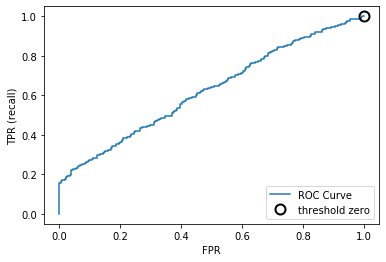

In [145]:
%matplotlib inline 
from sklearn import metrics
from sklearn.metrics import roc_curve
import numpy as np
from sklearn.metrics import auc


fpr, tpr, thresholds = roc_curve(y_test,lsc.decision_function(X_test_reduced))
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

In [146]:
from sklearn.metrics import roc_auc_score


print(roc_auc_score(y_test,lsc.decision_function(X_test_reduced)))

0.623552688172043


# SVC with linear kernel

In [147]:

from sklearn.svm import SVC
c_list = [0.01, 0.1, 1]
gammas = [0.01, 0.1,1]
param_grid = dict({'C':c_list, 'gamma': gammas})
print(param_grid)

{'C': [0.01, 0.1, 1], 'gamma': [0.01, 0.1, 1]}


In [148]:
grid = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train_reduced, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1], 'gamma': [0.01, 0.1, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [149]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.5942021584490299
{'C': 0.1, 'gamma': 0.01}
SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [150]:
svcl = SVC(C=0.1, gamma=0.01, kernel='linear')
svcl.fit(X_train_reduced, y_train)


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [151]:
svc_pred = svcl.predict(X_test_reduced)


In [152]:
print('Train score: {:.2f}'.format(svcl.score(X_train_reduced, y_train)))
print('Test score: {:.2f}'.format(svcl.score(X_test_reduced, y_test)))

Train score: 0.77
Test score: 0.78


In [153]:
from sklearn.metrics import confusion_matrix

print("Confusion matrix:\n{}".format(confusion_matrix(y_test, svc_pred)))

Confusion matrix:
[[  0 225]
 [  0 775]]


In [154]:
from sklearn.metrics import f1_score

print("f1 score knn: {:.2f}".format(f1_score(y_test, svc_pred)))

f1 score knn: 0.87


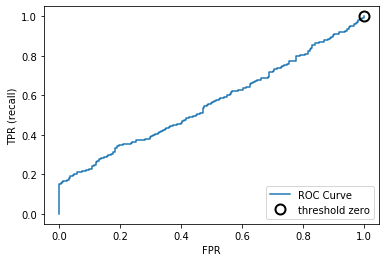

In [155]:
%matplotlib inline 
from sklearn import metrics
from sklearn.metrics import roc_curve
import numpy as np
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(y_test,svcl.decision_function(X_test_reduced))
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)


In [156]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, svcl.decision_function(X_test_reduced)))

0.5611125448028674


# SVC with rbf kernel

In [157]:
c_list = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1, 10]
param_grid = dict({'C':c_list, 'gamma': gammas})
print(param_grid)

{'C': [0.001, 0.01, 0.1, 1, 10], 'gamma': [0.001, 0.01, 0.1, 1, 10]}


In [158]:
grid = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train_reduced, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.001, 0.01, 0.1, 1, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [159]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.6071379935269384
{'C': 0.1, 'gamma': 0.001}
SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [160]:
svcb = SVC(C=0.1, gamma=0.001, kernel='rbf')
svcb.fit(X_train_reduced, y_train)


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [161]:
svc_pred = svcb.predict(X_test_reduced)


In [162]:
print('Train score: {:.2f}'.format(svcb.score(X_train_reduced, y_train)))
print('Test score: {:.2f}'.format(svcb.score(X_test_reduced, y_test)))

Train score: 0.77
Test score: 0.78


In [163]:
from sklearn.metrics import confusion_matrix

print("Confusion matrix:\n{}".format(confusion_matrix(y_test, svc_pred)))

Confusion matrix:
[[  0 225]
 [  0 775]]


In [164]:
from sklearn.metrics import f1_score

print("f1 score knn: {:.2f}".format(f1_score(y_test, svc_pred)))

f1 score knn: 0.87


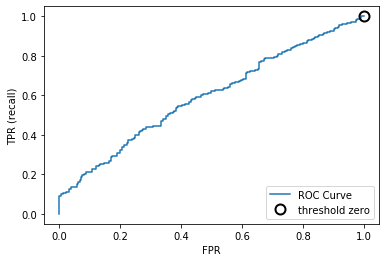

In [165]:
%matplotlib inline 
from sklearn import metrics
from sklearn.metrics import roc_curve
import numpy as np
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(y_test,svcb.decision_function(X_test_reduced))
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)


In [166]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, svcb.decision_function(X_test_reduced)))

0.5945290322580645


# SVC with poly kernel


In [167]:
c_list = [0.01, 0.1, 1, 10]
degrees = [1,2,3,4,5]
param_grid = dict({'C':c_list, 'degree': degrees})
print(param_grid)

{'C': [0.01, 0.1, 1, 10], 'degree': [1, 2, 3, 4, 5]}


In [168]:
grid = GridSearchCV(SVC(kernel='poly'), param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train_reduced, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10], 'degree': [1, 2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [169]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.6080825923716926
{'C': 10, 'degree': 4}
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=4, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


In [170]:
svcp = SVC(C=10, degree=4, kernel='poly')
svcp.fit(X_train_reduced, y_train)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=4, gamma='auto_deprecated',
    kernel='poly', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [171]:
svc_pred = svcp.predict(X_test_reduced)


In [172]:
print('Train score: {:.2f}'.format(svcp.score(X_train_reduced, y_train)))
print('Test score: {:.2f}'.format(svcp.score(X_test_reduced, y_test)))

Train score: 0.77
Test score: 0.78


In [173]:
from sklearn.metrics import confusion_matrix

print("Confusion matrix:\n{}".format(confusion_matrix(y_test, svc_pred)))

Confusion matrix:
[[  0 225]
 [  0 775]]


In [174]:
from sklearn.metrics import f1_score

print("f1 score knn: {:.2f}".format(f1_score(y_test, svc_pred)))

f1 score knn: 0.87


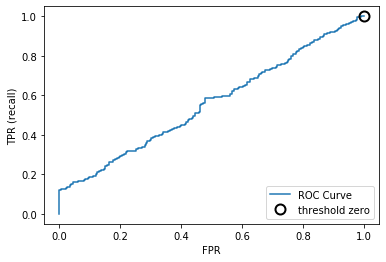

In [175]:
%matplotlib inline 
from sklearn import metrics
from sklearn.metrics import roc_curve
import numpy as np
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(y_test,svcp.decision_function(X_test_reduced))
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)


In [176]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, svcp.decision_function(X_test_reduced)))

0.5575111111111111


#  DECISION TREE


In [177]:
from sklearn.tree import DecisionTreeClassifier

In [178]:
param_grid={'max_depth': list(range(1,11))}
param_grid


{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [179]:
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='roc_auc')
grid.fit(X_train_reduced, y_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_s

In [180]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)


0.6364407543273446
{'max_depth': 6}
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [181]:
dt = DecisionTreeClassifier(max_depth= 5)
dt.fit(X_train_reduced, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [182]:
print('Train score: {:.2f}'.format(dt.score(X_train_reduced, y_train)))
print('Test score: {:.2f}'.format(dt.score(X_test_reduced, y_test)))

Train score: 0.77
Test score: 0.77


In [183]:
pred_dt = dt.predict(X_test_reduced)


In [184]:
from sklearn.metrics import confusion_matrix

print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred_dt)))

Confusion matrix:
[[  7 218]
 [  9 766]]


In [185]:
from sklearn.metrics import f1_score

print("f1 score knn: {:.2f}".format(f1_score(y_test, pred_dt)))

f1 score knn: 0.87


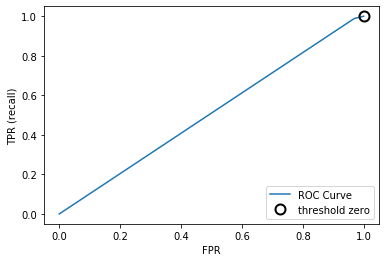

In [186]:
%matplotlib inline 
from sklearn import metrics
from sklearn.metrics import roc_curve
import numpy as np
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(y_test, pred_dt)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)


In [187]:

y_prob = dt.predict_proba(X_test_reduced)
prob = np.array(y_prob)[:, 1]


In [188]:
from sklearn.metrics import roc_auc_score

print(roc_auc_score(y_test, prob))

0.6151254480286739


# Neural Network

In [189]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

np.random.seed(0)

In [190]:
model = Sequential()

In [191]:
X_train = np.array(X_train)

In [192]:
y_train = np.array(y_train)


In [193]:
X_train = X_train.reshape(4000, 17)
X_test = X_test.reshape(1000, 17)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [194]:
X_train.shape

(4000, 17)

In [195]:
X_test.shape

(1000, 17)

In [196]:
model.add(Dense(10, input_dim = 17, activation = 'sigmoid'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1, activation = 'softmax'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [197]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


In [198]:
model.fit(X_train, y_train, epochs = 100, batch_size= 32)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
4000/4000 [==============================] - 0s 56us/sample - loss: 3.5688 - acc: 0.7673
Epoch 2/100
4000/4000 [==============================] - 0s 35us/sample - loss: 3.5688 - acc: 0.7673
Epoch 3/100
4000/4000 [==============================] - 0s 35us/sample - loss: 3.5688 - acc: 0.7673
Epoch 4/100
4000/4000 [==============================] - 0s 35us/sample - loss: 3.5688 - acc: 0.7673
Epoch 5/100
4000/4000 [==============================] - 0s 43us/sample - loss: 3.5688 - acc: 0.7673
Epoch 6/100
4000/4000 [==============================] - 0s 40us/sample - loss: 3.5688 - acc: 0.7673
Epoch 7/100
4000/4000 [==============================] - 0s 40us/sample - loss: 3.5688 - acc: 0.7673
Epoch 8/100
4000/4000 [==============================] - 0s 48us/sample - loss: 3.5688 - acc: 0.7673
Epoch 9/100
4000/4000 [==============================] - 0s 40us/sample - loss: 3.5688 - acc: 0.76

4000/4000 [==============================] - 0s 30us/sample - loss: 3.5688 - acc: 0.7673
Epoch 75/100
4000/4000 [==============================] - 0s 32us/sample - loss: 3.5688 - acc: 0.7673
Epoch 76/100
4000/4000 [==============================] - 0s 36us/sample - loss: 3.5688 - acc: 0.7673
Epoch 77/100
4000/4000 [==============================] - 0s 30us/sample - loss: 3.5688 - acc: 0.7673
Epoch 78/100
4000/4000 [==============================] - 0s 30us/sample - loss: 3.5688 - acc: 0.76730s - loss: 3.3808 - acc: 0.77
Epoch 79/100
4000/4000 [==============================] - 0s 31us/sample - loss: 3.5688 - acc: 0.7673
Epoch 80/100
4000/4000 [==============================] - 0s 32us/sample - loss: 3.5688 - acc: 0.7673
Epoch 81/100
4000/4000 [==============================] - 0s 32us/sample - loss: 3.5688 - acc: 0.7673
Epoch 82/100
4000/4000 [==============================] - ETA: 0s - loss: 3.5615 - acc: 0.767 - 0s 31us/sample - loss: 3.5688 - acc: 0.7673
Epoch 83/100
4000/4000 [====

In [199]:
model.evaluate(X_train, y_train)

4000/4000 [==============================] - 0s 29us/sample - loss: 3.5688 - acc: 0.7673


[3.5688113765716554, 0.76725]

In [200]:
model.evaluate(X_test, y_test)

1000/1000 [==============================] - 0s 23us/sample - loss: 3.4500 - acc: 0.7750


[3.449978807449341, 0.775]

In [201]:
y_pred = model.predict(X_test)

In [202]:
from sklearn.metrics import roc_auc_score
print('roc_auc value', roc_auc_score(y_test, y_pred))

roc_auc value 0.5


# Evaluation table

# Ensemble Models and neural Network

| Models | Best_cross_val_score_ | roc_auc score| Hyperparameters|
|---|---|---|---|
|Bagging with decision tree| 0.66388 | 0.51146 | max_samples = 500, n_estimators = 250
|Bagging with KNN | 0.630535 | 0.5 |max_samples = 400,n_estimators = 100
|Pasting with Decision tree| 0.76825 |  |max_samples =250, n_estimators = 200
|Pasting with knn | 0.76725 |0.5 | max_samples=100, n_estimators = 10
|Ada Boosting with logistic Regression | 0.61839 | 0.63 |learning_rate = 0.2, n_estimators = 200
|Ada Boosing with LinearSVC | 0.50128 | 0.5 | learning_rate': 0.01, 'n_estimators': 10
|Gradient Boosting | 0.668464 | 0.497706 |learning_rate = 0.1, max_depth = 2, n_estimators = 100
|Neural network | |0.5 | 